In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 프로그램 패키지 가져오기
from scipy.stats import chisquare
from scipy import stats
import scipy as sp

import statsmodels.api as sm
from statsmodels.formula.api import ols,logit, glm

In [3]:
path = '../data/spstat1.csv'

In [4]:
pd.read_csv(path,encoding='euc-kr',sep= ',')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1


In [5]:
df = pd.read_csv(path,encoding='euc-kr',sep= ',')
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [6]:
df.shape

(252, 29)

In [7]:
df.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [11]:
df[df[columns[1,2,4]]]

NameError: name 'columns' is not defined

In [12]:
df.at[5,'구매가격']

30

In [13]:
df['구매가격'] < 50

0       True
1       True
2       True
3       True
4       True
       ...  
247    False
248    False
249    False
250    False
251    False
Name: 구매가격, Length: 252, dtype: bool

In [14]:
df[df['구매가격'] < 50]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [15]:
# 구매가격이 150 초과 , 200미만

condition= (df['구매가격']>150)&(df['구매가격']<200)

In [19]:
df_copy= df.copy()

In [20]:
df_copy.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

기초통계

In [21]:
# 요약통계
# BIG 5(평균, 중위수, 최대-최소값, 사분위수)

df_copy['구매가격'].describe()

count    252.000000
mean     101.226190
std       38.654982
min       10.000000
25%       80.000000
50%      100.000000
75%      120.000000
max      250.000000
Name: 구매가격, dtype: float64

In [23]:
# 첨도(kurtosis)

df['구매가격'].kurtosis()

1.3613500036652209

In [24]:
# 왜도(skew)

df['구매가격'].skew()

0.8074518614845148

In [25]:
df['사용브랜드']

0      1
1      1
2      1
3      1
4      1
      ..
247    2
248    2
249    2
250    2
251    2
Name: 사용브랜드, Length: 252, dtype: int64

In [27]:
df['사용브랜드'].value_counts()

사용브랜드
1    127
2    125
Name: count, dtype: int64

In [28]:
from matplotlib import font_manager, rc, rcParams

rc('font',family = 'Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

In [29]:
import platform

# 운영체제 확인
system = platform.system()

#한글폰트 설정

if system == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
elif system == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'NanumGothic')
    
# 마이너스 기호(-) 깨짐
plt.rc('axes', unicode_minus = False)

In [30]:
%matplotlib inline

df_copy['사용브랜드'].replace([1,2],['삼성','애플'])

0      삼성
1      삼성
2      삼성
3      삼성
4      삼성
       ..
247    애플
248    애플
249    애플
250    애플
251    애플
Name: 사용브랜드, Length: 252, dtype: object

In [31]:
df_copy['사용브랜드'].replace([1,2],['삼성','애플']).value_counts()

사용브랜드
삼성    127
애플    125
Name: count, dtype: int64

In [ ]:
# 구글 콜랩에서 사용 - 한글깨짐 방지
# 한글 깨짐 방지
# 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [34]:
import matplotlib as mpl  # 기본 설정을 만지는 용도
import matplotlib.pyplot as plt # 그래프를 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())  #환경 설정이 되어 있는 폴더
print(mpl.get_cachedir())

3.8.0
c:\Users\USER\anaconda3\Lib\site-packages\matplotlib\__init__.py
C:\Users\USER\.matplotlib
C:\Users\USER\.matplotlib


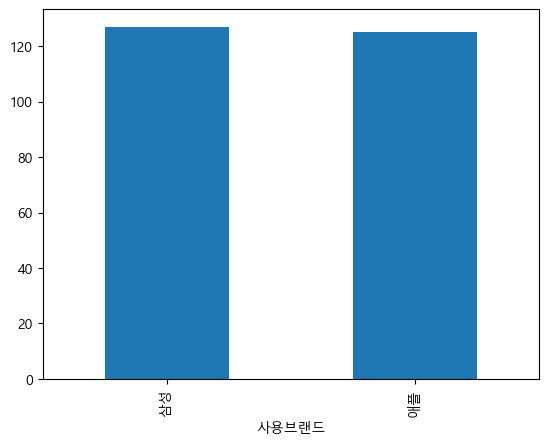

In [36]:
df_copy['사용브랜드'].replace([1,2],['삼성','애플']).value_counts().plot(kind = 'bar')
plt.show()

In [37]:
df_copy['성별'].value_counts()

성별
0    126
1    126
Name: count, dtype: int64

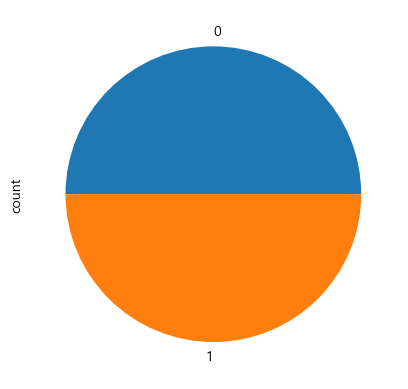

In [38]:
df_copy['성별'].value_counts().plot(kind='pie')
plt.show()

<Axes: ylabel='count'>

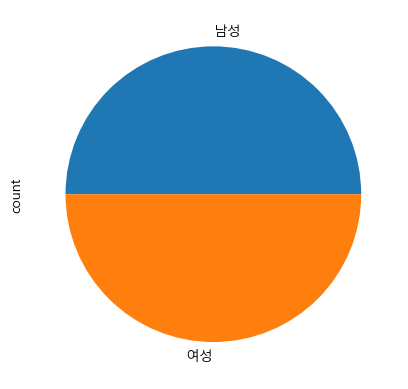

In [40]:
df_copy['성별'].replace([0,1],['남성','여성']).value_counts().plot(kind = 'pie')

<Axes: ylabel='count'>

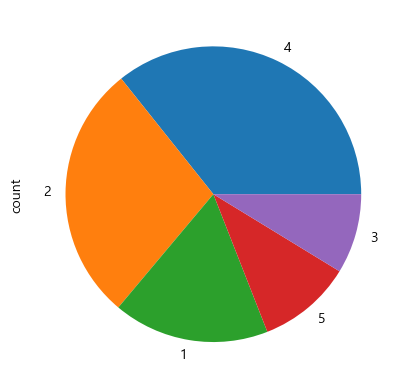

In [42]:
df_copy['구매장소'].value_counts().plot(kind = 'pie')

In [43]:
# 교차 분석


pd.crosstab(df_copy['월수입'],df_copy['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [47]:
# 카이제곱 분석
# 1) c : degree of freedom (자유도)
# 2) o :
# 3)

# chisquare(df_copy['월수입'],df_copy['사용브랜드']) 지원안함

import numpy as np

fobs = df_copy.월수입      # 관찰 빈도수 
fexp = df_copy.사용브랜드  # 기대 빈도수


fexp = fexp*(np.sum(fobs)/np.sum(fexp))
          # 관찰빈도수 합 /  기대 빈도수 합
            
chisquare(f_obs=fobs,f_exp=fexp)


# p-value=9.618060771117479e-05 (0.05(5%) alpha  유의수준)
# p-value 가  유의수준 alpha 보다 작으니까 유의함
# 고로 귀무가설이 기각 

Power_divergenceResult(statistic=343.26420150053593, pvalue=9.618060771117479e-05)

In [49]:
import numpy as np
fobs = np.array([10,20])
fexp = np.array([30,60])

fexp = fexp * (np.sum(fobs)/np.sum(fexp))

chisquare(f_obs=fobs,f_exp=fexp)
#  p- value=1.0 -> 전혀 유효하지않다

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [51]:
pd.crosstab(df_copy['구매장소'],df_copy['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [52]:
chisquare(df_copy['구매장소'])

Power_divergenceResult(statistic=148.31174089068827, pvalue=0.9999999645077914)

In [53]:
chisquare(df_copy['구매장소'],ddof=[0,1])

# ddof = [0,1] : degree of freedom (자유도)를 보정 한 값
# 범주표 행 차원에서 1을 빼고, 열차원은 변경하지 않음

Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

In [54]:
chisquare(df_copy['성별'],ddof=[0,1])

Power_divergenceResult(statistic=126.0, pvalue=array([1., 1.]))

In [55]:
chisquare(df_copy['월수입'],ddof=[0,1])

Power_divergenceResult(statistic=196.2733118971061, pvalue=array([0.99555742, 0.99491356]))

T 검정

In [56]:
# 2개의 독립변인(남성/여성, 삼성/애플) 평균차이 비교

df_copy['구매가격'].values

array([ 15,  20,  25,  26,  30,  30,  40,  40,  40,  40,  40,  45,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  60,  60,  60,  60,
        60,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  72,  75,  75,  75,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  85,
        89,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  95,  99, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 130, 130, 130, 150,  10,  48,  50,
        50,  70,  70,  70,  70,  75,  80,  80,  80,  80,  89,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [60]:
mean = df_copy['구매가격'].values

mean1 = df_copy[df_copy['사용브랜드']==1].구매가격.values
mean2 = df_copy[df_copy['사용브랜드']==2].구매가격.values

C:\Users\USER\AppData\Local\Temp\ipykernel_35596\2654569427.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean1, kde=True,fit = sp.stats.norm)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_35596\2654569427.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with

<Axes: ylabel='Density'>

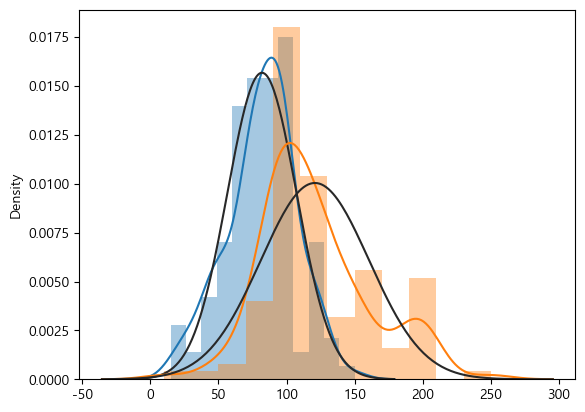

In [63]:
from IPython.core.prefilter import PrefilterChecker
%matplotlib inline

sns.distplot(mean1, kde=True,fit = sp.stats.norm) 
# kde = karnel density estimation --> 확률 밀도 함수
sns.distplot(mean2, kde=True,fit = sp.stats.norm) 


In [64]:
# 정규성 검정 테스트 shapiro test

print(sp.stats.shapiro(mean1))
print()
print(sp.stats.shapiro(mean2))

# shapiro - wilk test (정규성 검정 테스트)
# H0 (귀무가설) H1(대립가설)
# 가설 : hypothesis

# 여기서는 H0 : normal distribution(정규분포)를 따른다
#          귀무가설 : 정규분포를 따른다
#         H1 : not H0
#          대립가설 : 정규분포를 따르지 않는다
# 결과해석
# ShapiroResult(statistic=0.9720977544784546, pvalue=0.009972690604627132)
# mean1의 p-value <0.05 이므로 귀무가설을 기각하고 대립가설 채택
# '정규분포를 따른다'를 기각

# ShapiroResult(statistic=0.9252861738204956, pvalue=3.2918255783442874e-06)
# mean2의 p-value <0.05 이므로 귀무가설을 기각하고 대립가설 채택
# '정규분포를 따른다'를 기각


ShapiroResult(statistic=0.9720977544784546, pvalue=0.009972690604627132)

ShapiroResult(statistic=0.9252861738204956, pvalue=3.2918255783442874e-06)


In [65]:
# 등분산 가정(르벤 테스트)
# H0(귀무가설): 두 집단의 분산은 같다
# H1(대립가설) : Not H0

sp.stats.levene(mean1,mean2)

# pvalue=0.00030027808643848084 <0.05 이므로 귀무가설을 기각하고 대립가설 채택
# 귀무가설인 분산이 같지 않으므로 등분산 가정을 위배

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [66]:
# 독립표본 T - test(Independent 2 sample t-test)

stats.ttest_ind(mean1,mean2,equal_var = False)
# equal_var = False-> 등분산이 같지 않을 때 써야함
# equal_var = True  -> 등분산이 같을 때 써야함

# pvalue=3.598124628532717e-17 <0.05
# 귀무가설('두 집단의 차이는 없다') 기각 
# 따라서 대립가설(두 집단의 차이가 있다) 채택

TtestResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17, df=210.54390737951886)

In [68]:
df['재구매의향'].values

array([3, 3, 2, 5, 3, 2, 5, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 4, 3,
       5, 3, 2, 3, 3, 2, 5, 1, 3, 2, 3, 3, 5, 2, 3, 3, 3, 2, 1, 1, 4, 2,
       1, 3, 5, 4, 1, 2, 2, 4, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 2, 3, 5, 1,
       4, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 5, 3, 1, 4, 3, 4, 1, 3, 5, 1, 3,
       5, 3, 5, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 5, 1, 1, 3, 3,
       3, 3, 1, 1, 2, 5, 5, 5, 1, 1, 3, 1, 1, 4, 4, 3, 1, 1, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 5, 2, 5, 2, 2, 1, 2, 1, 2, 2, 3,
       3, 3, 5, 5, 5, 4, 5, 4, 2, 3, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 3, 3,
       1, 2, 2, 3, 1, 4, 3, 2, 2, 2, 2, 5, 5, 4, 5, 3, 4, 2, 3, 2, 3, 3,
       3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 3, 3, 1, 4, 4, 4, 5, 3, 1, 2, 2, 2,
       5, 5, 2, 1, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2, 2, 5, 3, 2, 4, 3, 4, 5,
       4, 3, 2, 3, 2, 3, 3, 4, 3, 3], dtype=int64)

In [72]:
mean = df['재구매의향'].values

mean1 = df[df['사용브랜드']==1].재구매의향.values
mean2 = df[df['사용브랜드']==2].재구매의향.values

C:\Users\USER\AppData\Local\Temp\ipykernel_35596\2654569427.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean1, kde=True,fit = sp.stats.norm)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_35596\2654569427.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with

<Axes: ylabel='Density'>

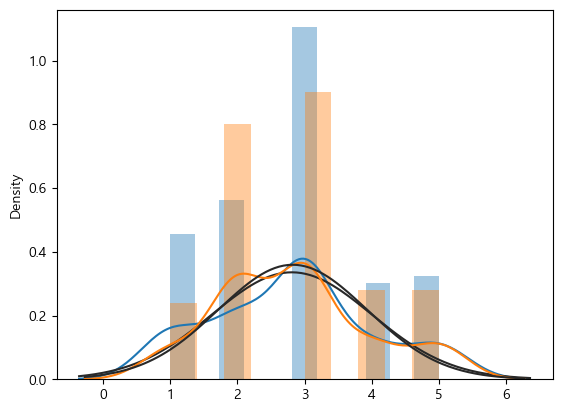

In [73]:
from IPython.core.prefilter import PrefilterChecker
%matplotlib inline

sns.distplot(mean1, kde=True,fit = sp.stats.norm) 
# kde = karnel density estimation --> 확률 밀도 함수
sns.distplot(mean2, kde=True,fit = sp.stats.norm) 


In [74]:
# 정규성 검정테스트
print(sp.stats.shapiro(mean1))
print()
print(sp.stats.shapiro(mean2))

# 결과해석
# 정규성 검정 결과 :  두 집단 모두 정규성을 띄지 않는다

ShapiroResult(statistic=0.8974907994270325, pvalue=7.541181901160598e-08)

ShapiroResult(statistic=0.8939266204833984, pvalue=5.995654817070317e-08)


In [75]:
# 등분산 가정(르벤 테스트)
sp.stats.levene(mean1, mean2)

# p-value=0.7315465812585951 >0.05 이므로 귀무가설 채택 -> 두 집단의 분산은 같다

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585951)

In [76]:
# 독립표본 T-test

stats.ttest_ind(mean1,mean2, equal_var=True)
# p-value=0.9290258377820513 >0..5
# 독립적인 두 집단(1,2)의 평균의 차이가 없다

TtestResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513, df=250.0)

In [87]:
# 분산 분석(ANOVA)
# 3 집단 이상 평균 차이 분석
# 연령2 : 3집단으로 연령대(10대,20대,30대, ...)
# 요인분석 : 공통성을 기준으로 요인별로 묶는 것

df[df['연령2']==1].head(2)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3


In [81]:
df[df['연령2']==1].재구매의향
#인덱스로 달고 나와서 list로 바꿔야함

4      3
5      2
7      2
8      2
9      3
      ..
233    2
245    3
247    3
248    3
250    3
Name: 재구매의향, Length: 90, dtype: int64

In [83]:
anova1 =df[df['연령2']==1].재구매의향.values
anova2 =df[df['연령2']==2].재구매의향.values
anova3 =df[df['연령2']==3].재구매의향.values

C:\Users\USER\AppData\Local\Temp\ipykernel_35596\3313109163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1,kde=False, fit= sp.stats.norm)
C:\Users\USER\AppData\Local\Temp\ipykernel_35596\3313109163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2,kde=False, fit= sp.stats.no

<Axes: >

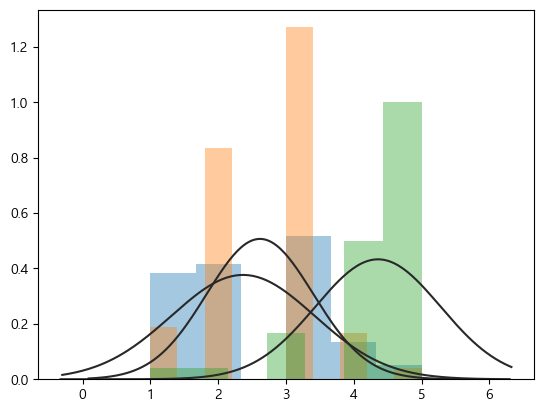

In [86]:
sns.distplot(anova1,kde=False, fit= sp.stats.norm)
sns.distplot(anova2,kde=False, fit= sp.stats.norm)
sns.distplot(anova3,kde=False, fit= sp.stats.norm)

C:\Users\USER\AppData\Local\Temp\ipykernel_35596\1819853689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1,kde=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_35596\1819853689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2,kde=False)
C:\Users\USER\AppData\Local\Temp\ipy

<Axes: >

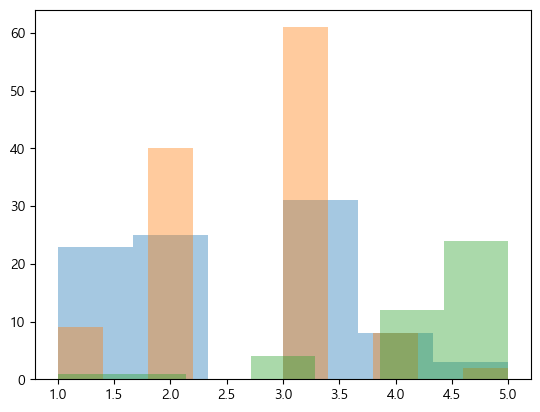

In [88]:
sns.distplot(anova1,kde=False)
sns.distplot(anova2,kde=False)
sns.distplot(anova3,kde=False)

In [89]:
stats.f_oneway(anova1,anova2,anova3)
# H0 : 세 집단간 평균 차이는 없다
# H1 : Not H0

# p-value=1.613686022426391e-25 <0.05 
# 귀무가설 기각 -> 대립가설 채택
# 적어도 한 집단은 평균의 차이가 있다 ex) anova1 = anova2 , anova1 != anova3
# 그러므로 사후 테스트 필요



F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

In [93]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog= df['재구매의향'],  # 데이터
                         groups= df['연령2'],      # 그룹
                         alpha= 0.05)              # 유의수준

tukey.summary()
# P-adf를 유의수준(0.05) 봐야함
# group 1과 group2의 평균의 차이가 있다

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1276,-0.0526,0.5526,False
1,3,1.9905,0.0,1.585,2.396,True
2,3,1.7405,0.0,1.3514,2.1295,True


<function matplotlib.pyplot.show(close=None, block=None)>

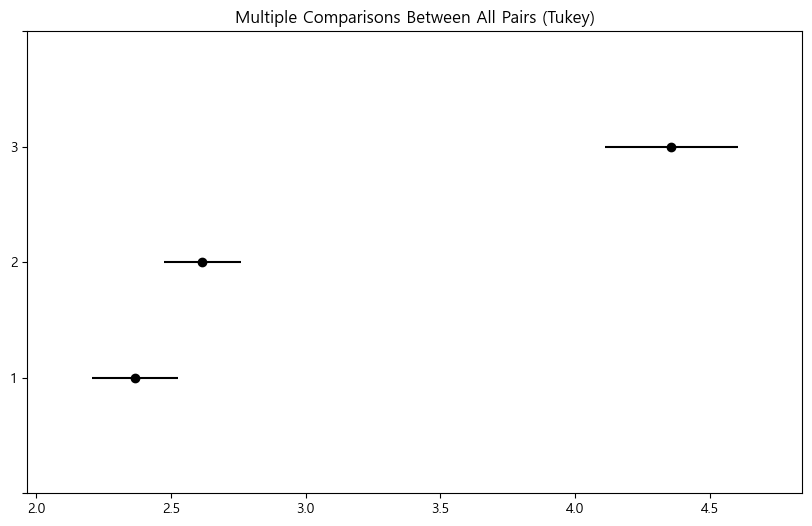

In [97]:
tukey.plot_simultaneous()

plt.vlines(x = 49.57, ymin= 0.5, ymax=4.5, color = 'red')
plt.show

In [98]:
# 연령에 따른 구매 가격 차이

anova1 = df[df['연령2']==1].구매가격.values
anova2 = df[df['연령2']==2].구매가격.values
anova3 = df[df['연령2']==3].구매가격.values

In [99]:
stats.f_oneway(anova1,anova2,anova3)
# H0 : 세 집단간 평균 차이는 없다
# H1 : Not H0

# pvalue=0.44245014422691564 > 0.05
# 귀무가설 채택 -> 세 집단간 평균 차이는 없다

F_onewayResult(statistic=0.8181036982598708, pvalue=0.44245014422691564)

C:\Users\USER\AppData\Local\Temp\ipykernel_35596\902180980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1,kde=False, fit=sp.stats.norm)
C:\Users\USER\AppData\Local\Temp\ipykernel_35596\902180980.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2,kde=False, fit=sp.stats.norm)


<Axes: >

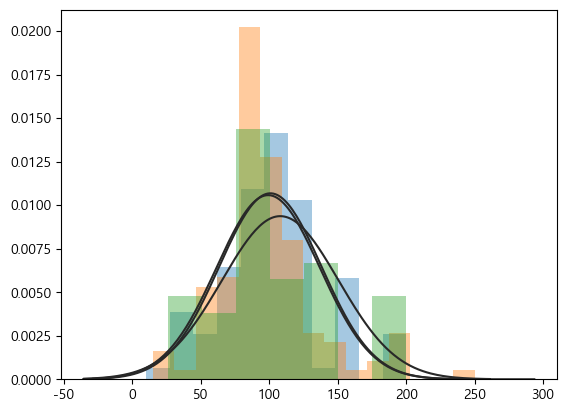

In [100]:
sns.distplot(anova1,kde=False, fit=sp.stats.norm)
sns.distplot(anova2,kde=False, fit=sp.stats.norm)
sns.distplot(anova3,kde=False, fit=sp.stats.norm)

C:\Users\USER\AppData\Local\Temp\ipykernel_35596\1819853689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1,kde=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_35596\1819853689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2,kde=False)
C:\Users\USER\AppData\Local\Temp\ipy

<Axes: >

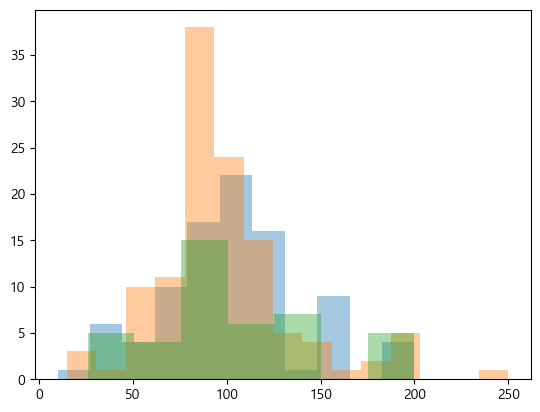

In [101]:
sns.distplot(anova1,kde=False)
sns.distplot(anova2,kde=False)
sns.distplot(anova3,kde=False)

In [102]:
# 상관분석

sp.stats.pearsonr(df['재구매의향'],df['구입조언'])

# H0: 상관관계가 없다
# H1: Not H0

# pvalue=4.546075388272177e-12 <0.05
# 귀무가설 기각 --> 대립가설 채택
# 상관관계가 있다

PearsonRResult(statistic=0.41783620648818587, pvalue=4.546075388272177e-12)

In [103]:
df.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [106]:
ols(formula='재구매의향 ~ \
            성별+ 연령+ 학력+ 월수입+ 사용기간+ 구입조언+ 브랜드이미지+ 가격만족도+ 하루사용시간',data=df).fit().summary()

# R-squared 가 높아야 설명력이 높은 변수

# P>|t| 가 0.05보다 작은 것들을 찾는다


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     62.48
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.96e-58
Time:                        11:51:47   Log-Likelihood:                -241.58
No. Observations:                 252   AIC:                             503.2
Df Residuals:                     242   BIC:                             538.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2899      0.188     -1.545      0.124      -0.659       0.080
성별             0.0575      0.085      0.674      0.501      -0.111       0.226
연령             0.0581      0.046      1.263      0.208      -0.033       0.149
학력             0.0052      0.025      0.205      0.838      -0.044       0.055
월수입           -0.0397      0.027     -1.490      0.137      -0.092       0.013
사용기간           0.1306      0.034      3.848      0.000       0.064       0.197
구입조언           0.1249      0.048      2.575      0.011       0.029       0.220
브랜드이미지         0.4466      0.044     10.167      0.000       0.360       0.533
가격만족도          0.4009      0.052      7.775      0.000       0.299       0.502
하루사용시간        -0.0018      0.031     -0.057      0.954      -0.062       0.059
==============================================================================
Omnibus:                        5.105   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.410
Skew:                          -0.242   Prob(JB):                        0.110
Kurtosis:                       2.569   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# P>|t| 가 0.05보다 높은 것들을 제거 후 다시 코딩

ols(formula='재구매의향 ~ \
                사용기간+ 구입조언+ 브랜드이미지+ 가격만족도' ,data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.15e-62
Time:                        11:55:20   Log-Likelihood:                -243.50
No. Observations:                 252   AIC:                             497.0
Df Residuals:                     247   BIC:                             514.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3117      0.144     -2.160      0.032      -0.596      -0.027
사용기간           0.1328      0.033      4.023      0.000       0.068       0.198
구입조언           0.1525      0.039      3.873      0.000       0.075       0.230
브랜드이미지         0.4461      0.044     10.236      0.000       0.360       0.532
가격만족도          0.4133      0.048      8.563      0.000       0.318       0.508
==============================================================================
Omnibus:                        5.351   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.625
Skew:                          -0.251   Prob(JB):                       0.0990
Kurtosis:                       2.565   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

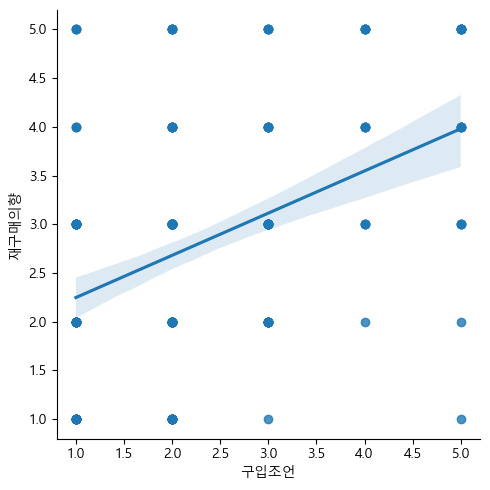

In [111]:
import seaborn as sns
sns.lmplot(y = '재구매의향', x='구입조언',data=df)
plt.show()